In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense,BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os


2022-11-08 15:57:47.087374: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
main_dir = './dataset'
train_dir = os.path.join(main_dir,'train')
test_dir = os.path.join(main_dir,'test')
valid_dir = os.path.join(main_dir,'valid')

train_mask_dir = os.path.join(train_dir,'with_mask')
train_No_mask_dir = os.path.join(train_dir,'without_mask')

In [28]:

classes_ = ["with_mask","without_mask"]

In [29]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[0:10])

['63.jpg', '1_0_2 copy 6.jpg', '0_0_24 copy.jpg', '189.jpg', '0_0_8 copy 10.jpg', '0_0_25 copy.jpg', '0_0_34.jpg', '1_0_20.jpg', '162.jpg', '330-with-mask.jpg']


In [30]:
train_No_mask_names = os.listdir(train_No_mask_dir)
print(train_No_mask_names[0:10])

['63.jpg', 'augmented_image_19.jpg', '77.jpg', '0_0_dongchengpeng_0042.jpg', '1_0_yangmi_0144.jpg', 'augmented_image_224.jpg', 'augmented_image_31.jpg', 'augmented_image_25.jpg', '0_0_linyilun_0040.jpg', '0_0_caizhuoyan_0046.jpg']


In [31]:

mask_images = []

for i in train_mask_names:
  mask_images.append(os.path.join(train_mask_dir,i))

non_mask_images=[]

for i in train_No_mask_names:
  non_mask_images.append(os.path.join(train_No_mask_dir,i))
  

In [32]:
import plotly.express as px
from skimage import io
from skimage.transform import resize

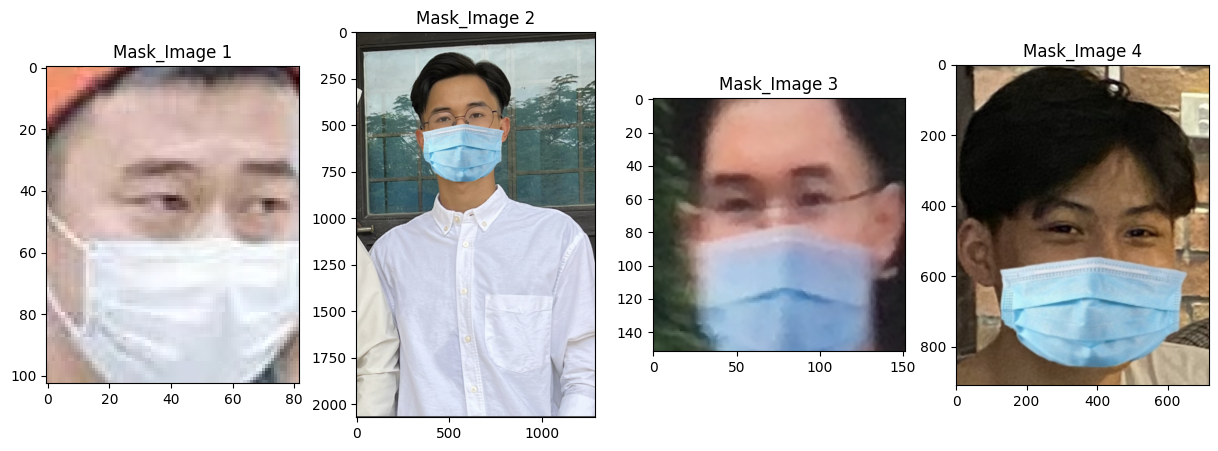

In [33]:
fig,ax = plt.subplots(1,4,figsize=(15,5))
img1 = io.imread(mask_images[10]) #170 610 630
img2 = io.imread(mask_images[223]) #890 894
img3 = io.imread(mask_images[170])
img4 = io.imread(mask_images[610])

ax[0].imshow(img1)
ax[0].set_title("Mask_Image 1")

ax[1].imshow(img2)
ax[1].set_title("Mask_Image 2")

ax[2].imshow(img3)
ax[2].set_title("Mask_Image 3")

ax[3].imshow(img4)
ax[3].set_title("Mask_Image 4")


plt.show()


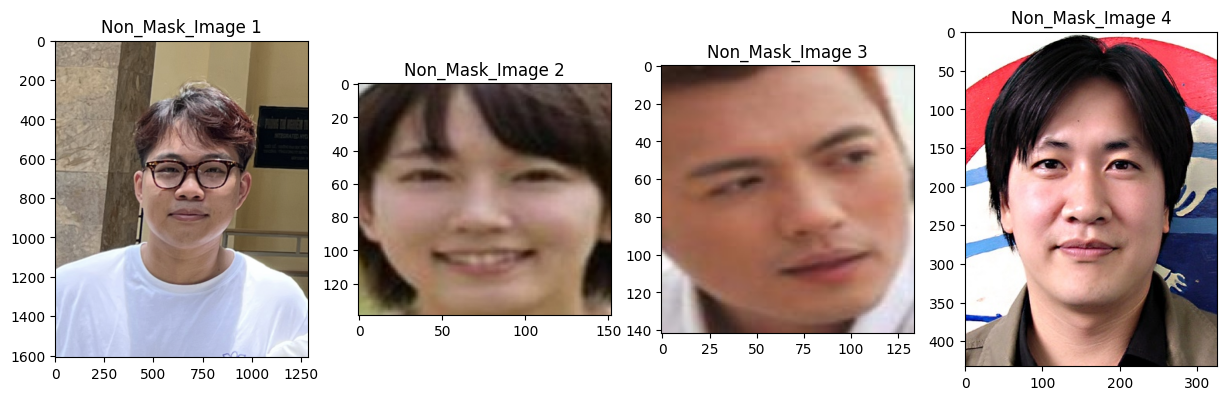

In [34]:
fig,ax = plt.subplots(1,4,figsize=(15,5))
img1 = io.imread(non_mask_images[111])
img2 = io.imread(non_mask_images[411])
img3 = io.imread(non_mask_images[727])
img4 = io.imread(non_mask_images[300])

ax[0].imshow(img1)
ax[0].set_title("Non_Mask_Image 1")

ax[1].imshow(img2)
ax[1].set_title("Non_Mask_Image 2")

ax[2].imshow(img3)
ax[2].set_title("Non_Mask_Image 3")

ax[3].imshow(img4)
ax[3].set_title("Non_Mask_Image 4")


plt.show()


In [35]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   rotation_range=25,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224,224),
                                                    batch_size=32,
                                                    class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='binary')
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size=(224,224),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 3062 images belonging to 2 classes.
Found 218 images belonging to 2 classes.
Found 842 images belonging to 2 classes.


In [36]:
train_generator.class_indices

{'with_mask': 0, 'without_mask': 1}

In [37]:
train_generator.image_shape

(224, 224, 3)

In [40]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(224,224,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 112, 112, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 56, 56, 64)       

In [42]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=4)

In [43]:
model_train = model.fit(train_generator,epochs=25,
          validation_data=valid_generator,
          batch_size=32)

Epoch 1/25
96/96 [==============================] - 130s 1s/step - loss: 0.7270 - accuracy: 0.5434 - val_loss: 0.6845 - val_accuracy: 0.5879
Epoch 2/25
96/96 [==============================] - 110s 1s/step - loss: 0.4639 - accuracy: 0.7969 - val_loss: 0.4394 - val_accuracy: 0.8456
Epoch 3/25
96/96 [==============================] - 116s 1s/step - loss: 0.2351 - accuracy: 0.9180 - val_loss: 0.3398 - val_accuracy: 0.8836
Epoch 4/25
96/96 [==============================] - 102s 1s/step - loss: 0.1822 - accuracy: 0.9357 - val_loss: 0.3152 - val_accuracy: 0.8848
Epoch 5/25
96/96 [==============================] - 125s 1s/step - loss: 0.1688 - accuracy: 0.9406 - val_loss: 0.3049 - val_accuracy: 0.8872
Epoch 6/25
96/96 [==============================] - 110s 1s/step - loss: 0.1601 - accuracy: 0.9419 - val_loss: 0.3044 - val_accuracy: 0.8919
Epoch 7/25
96/96 [==============================] - 117s 1s/step - loss: 0.1543 - accuracy: 0.9494 - val_loss: 0.2999 - val_accuracy: 0.8895
Epoch 8/25
96

In [52]:
model.save("new_improved_model.h5")

In [44]:
import pandas as pd
metrics = pd.DataFrame(model.history.history)

In [45]:
metrics.head(10)

loss  accuracy  val_loss  val_accuracy
0  0.726951  0.543436  0.684522      0.587886
1  0.463916  0.796865  0.439435      0.845606
2  0.235093  0.918027  0.339835      0.883610
3  0.182213  0.935663  0.315153      0.884798
4  0.168821  0.940562  0.304877      0.887173
5  0.160051  0.941868  0.304410      0.891924
6  0.154307  0.949380  0.299889      0.889549
7  0.149431  0.945787  0.279039      0.896675
8  0.150212  0.948726  0.266144      0.909739
9  0.142779  0.951339  0.275988      0.907363

In [46]:
test_loss,test_accuracy = model.evaluate_generator(test_generator)

In [47]:
print('test_loss: ',test_loss)
print('test_accuracy: ',test_accuracy)

test_loss:  1.9147239923477173
test_accuracy:  0.5321100950241089


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


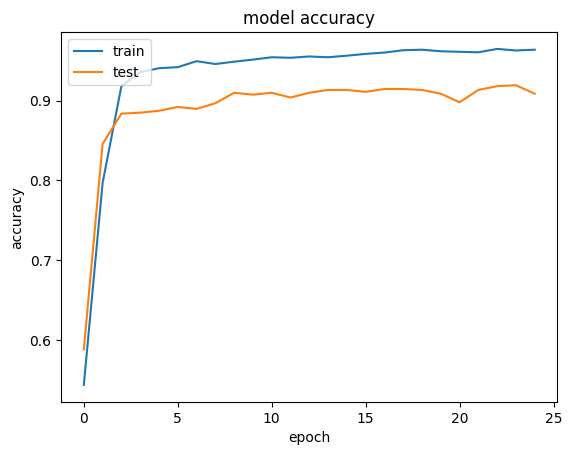

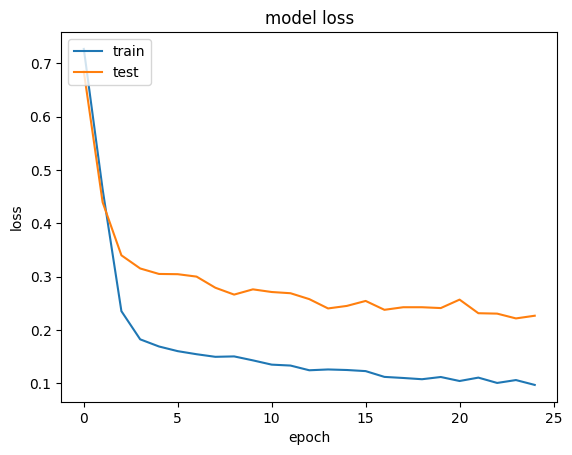

In [48]:
print(model_train.history.keys())
# summarize history for accuracy
plt.plot(model_train.history['accuracy'])
plt.plot(model_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_train.history['loss'])
plt.plot(model_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()